In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
from sklearn.metrics import classification_report

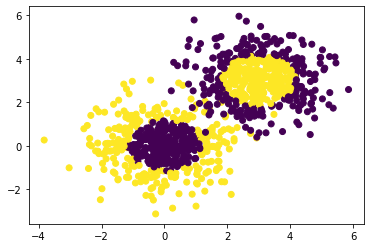

In [6]:
# 生成二维正态分布, 生成的数据按分位数分为两类,500个样本, 2个样本特征
x1, y1 = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes =2)
x2, y2 = make_gaussian_quantiles(mean = (3,3), n_samples=500, n_features=2, n_classes=2)
# 将两组数据合成一组数据
x_data = np.concatenate((x1, x2))
y_data = np.concatenate((y1, -y2 + 1))# 看图结果 -y2+1 为了使标签反转 0>>1 1>>0
plt.scatter(x_data[:,0],x_data[:,1],c =y_data)
plt.show()

In [7]:
# decision  tree model 
model = tree.DecisionTreeClassifier(max_depth=3)
model.fit(x_data, y_data)

DecisionTreeClassifier(max_depth=3)

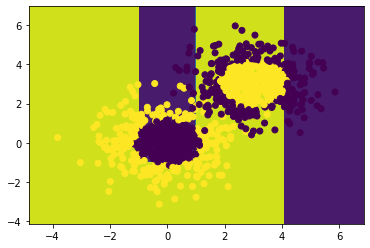

0.786

In [11]:
x_min, x_max = x_data[:,0].min()-1, x_data[:,0].max()+1
y_min, y_max = x_data[:,1].min()-1, x_data[:,1].max()+1
# 生成网络矩阵 画图背景
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
z = model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
cl = plt.contourf(xx, yy, z)
plt.scatter(x_data[:,0],x_data[:,1],c =y_data)
plt.show()
model.score(x_data, y_data)

In [13]:
# AdaBost model
Ada_model = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=10)
Ada_model.fit(x_data, y_data)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=10)

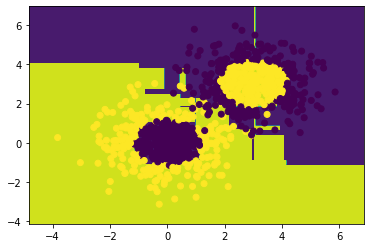

0.978

In [15]:
x_min, x_max = x_data[:,0].min()-1, x_data[:,0].max()+1
y_min, y_max = x_data[:,1].min()-1, x_data[:,1].max()+1
# 生成网络矩阵 画图背景
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
z = Ada_model.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
cl = plt.contourf(xx, yy, z)
plt.scatter(x_data[:,0],x_data[:,1],c =y_data)
plt.show()
Ada_model.score(x_data, y_data)